# Clustering and PCA

In this assignment, you will be exploring difference between clique and kmeans algorithms for clustering and will get better understanding of PCA & Kmeans algorithms by manually implementing both of them.

--------------------

In [ ]:
!pip install pyclustering
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from pyclustering.cluster.clique import clique, clique_visualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from numpy.linalg import eig
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 13.4 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=2505c6ecb2c7f4bfff56533da98b058b9daaa6635d14722c70dd6456a7df69a8
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [ ]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)
#X1,X2=np.split(X,2,axis=1)

# Questoin 1
Scatter plot the dataset

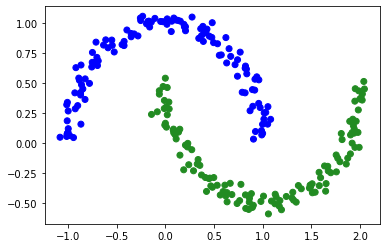

In [ ]:
colors = ['blue', 'forestgreen']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X[:,0], X[:,1], c=vectorizer(y))

# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

In [ ]:
#Wont perform well, as we can see the two clusters that can be seen by eye are enturined in a way that k menas will difentily missclassifies like half od the data 
#Or more preciesly the half crescent 

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train KMeans model using "k = 2".
4. Comment on the results.

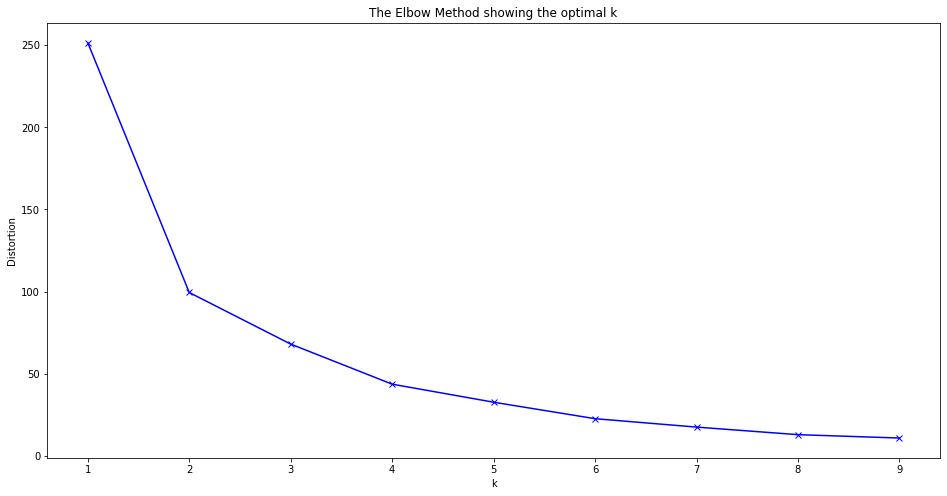

-99.48652012837258


In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X,y)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(X,y)
print(kmeanModel.score(X,y))
#Comment: as it shown in the graph best K is 4 , any k before it will give under fitting

# Question 4
1. If you are going to use clique, what is a proper threshold value for the above dataset.
2. Find the best interval value that cluster the data into two clusters, plot the results.
3. Why do you think clique performed better on this dataset in comparison with KMeans?

Amount of clusters: 2


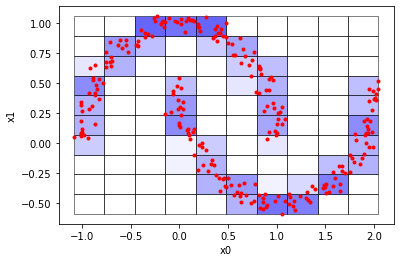

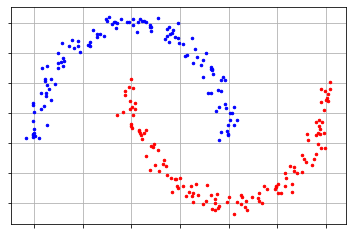

In [ ]:
# create CLIQUE algorithm for processing
intervals = 10  # defines amount of cells in grid in each dimension
threshold = 0 # lets consider each point as non-outlier
clique_instance = clique(X, intervals, threshold)
# start clustering process and obtain results
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))
# visualize clustering results
clique_visualizer.show_grid(cells, X)    # show grid that has been formed by the algorithm
clique_visualizer.show_clusters(X, clusters, noise)  # show clustering results

#clique perfomred better as data can be divided into high density grids whuch works perfectly with clique and will cause problem in k means

# Question 5
For the following dataset
1. Run kmeans algorithm clustering using k=2.
2. Run clique algorithm using interval = 15 and threshold = 6.
3. Plot results of both algorithms.
4. Comment on the following
    * What is the number of clusters in case of clique? and why?
    * Why do kmeans fail to cluster such data?

Amount of clusters: 4


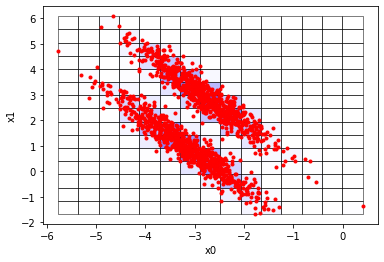

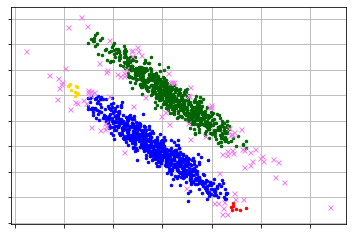

In [ ]:

intervals = 15  # defines amount of cells in grid in each dimension
threshold = 6 
clique_instance = clique(X_aniso, intervals, threshold)

clique_instance.process()
clusters = clique_instance.get_clusters()  
noise = clique_instance.get_noise()     
cells = clique_instance.get_cells()     
print("Amount of clusters:", len(clusters))

clique_visualizer.show_grid(cells, X_aniso)    
clique_visualizer.show_clusters(X_aniso, clusters, noise) 

#4 clusters , due to thershold set

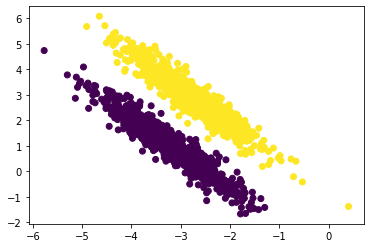

In [ ]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(X,y)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)

italicized text# Question 6

Write your own PCA function that will return:
* The sorted eigenvectors of principal components
* The corresponding eigenvalues
* The transformed data

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [ ]:
import pandas as pd
def PCAByZeiad(Dataframe):#dataframe containing feature
#frist we calculate mean for each column
 length=Dataframe.shape[1]
 for i in range(0,length):
   col=Dataframe.iloc[:, i]
   Mean=col.mean()
   Dataframe.iloc[:, i]=Dataframe.iloc[:, i]- Mean
#Then we calculate covarince matrix for the data frame
 CovarinceMatrix=Dataframe.cov()
 EigenValue,EigenVector=eig(CovarinceMatrix)
 idx = EigenValue.argsort()[::-1]   
 EigenValue = EigenValue[idx]
 EigenVector = EigenVector[:,idx]
 Dataframe=np.dot(Dataframe,EigenVector)
 return EigenVector,EigenValue,Dataframe

from sklearn import datasets
#columns = ['sepal length','sepal width','petal length','petal width','type']
iris = datasets.load_iris()#pd.read_csv(r'C:\Users\Zeiad\Downloads\iris.data', sep=',', names  = columns)
features = iris.data#['sepal length','sepal width','petal length','petal width']
label =iris.target #['type']
x=pd.DataFrame(features)
#print(features)
PCAByZeiad(x)
#y = data[label]
#PCAByZeiad(x)




(array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
        [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
        [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
        [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]]),
 array([4.22824171, 0.24267075, 0.0782095 , 0.02383509]),
 array([[-2.68412563e+00, -3.19397247e-01, -2.79148276e-02,
          2.26243707e-03],
        [-2.71414169e+00,  1.77001225e-01, -2.10464272e-01,
          9.90265503e-02],
        [-2.88899057e+00,  1.44949426e-01,  1.79002563e-02,
          1.99683897e-02],
        [-2.74534286e+00,  3.18298979e-01,  3.15593736e-02,
         -7.55758166e-02],
        [-2.72871654e+00, -3.26754513e-01,  9.00792406e-02,
         -6.12585926e-02],
        [-2.28085963e+00, -7.41330449e-01,  1.68677658e-01,
         -2.42008576e-02],
        [-2.82053775e+00,  8.94613845e-02,  2.57892158e-01,
         -4.81431065e-02],
        [-2.62614497e+00, -1.63384960e-01, -2.18793179e-02,
         -4.52978706e-0

# Question 7
Write your own K-means clustering, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [212]:
#!pip install math
from scipy.spatial import distance
import random
from sklearn.cluster import KMeans
import numpy as np
#from math import dist
def CalculateNewCenters(ClusterList):
  NewCenters=[]
  
  for i in range(0,len(ClusterList)):
    #centeroid=np.mean(ClusterList[i])
    #del ClusterList[i][0]
    #ClusterList[i] = np.array(ClusterList[i])
    #centeroid=ClusterList[i].mean(axis=0)
    centeroid=np.average(ClusterList[i],axis=0)
    NewCenters.append(centeroid)
  #print(NewCenters)
  return NewCenters  

def AssignPointsToClusters(CenterList,Data):
  ClustersList=[]
  for i in range(0,len(CenterList)):
    ClustersList.append([[0,0]])

  
  for i in range(0,len(Data)):
    DistanceList=[]
    for j in range(0,len(CenterList)):
      #DistanceList.append(distance.euclidean(CenterList[j],Data[i]))
      DistanceList.append(np.linalg.norm(Data[i]-CenterList[j]))
      #DistanceList.append(dist(Data[i],CenterList[j]))
      #print(DistanceList[j])
      MinDistance=min(DistanceList)
      #print("Distance",MinDistance)
      MinIndex = DistanceList.index(MinDistance)
      ClustersList[MinIndex].append(Data[i])
  for i in range(0,len(ClustersList)):
   del ClustersList[i][0]
  #print(ClustersList)
  return ClustersList
def KmeansByZeiad(k,DataSet):
  #DataSet=np.asarray(DataSet)
  #MaxValues=DataSet.max(axis=0)
  #MinValues=DataSet.min(axis=0)
  #MinX=MinValues[0]
  #MinY=MinValues[1]
  #MaxX=MaxValues[0]
  #MaxY=MaxValues[1]
  #Centers=[[10,4],[1,0]]
  Centers=[]
  #centers first intialzization
  for i in range(0,k):
    index=random.randint(0, len(DataSet)-1)
    Centers.append(DataSet[index])#problem here 
    #Centers.append([MinX+1,MinY+1])
  #print(Centers)
  ClustersList=[]
  #print(Centers)
  for k in range(0,500):
      ClustersList=AssignPointsToClusters(Centers,DataSet)
      Centers=CalculateNewCenters(ClustersList)
      #print(Centers)

  return Centers

  #for i in range(0,len(DataSet)):
   # DistanceList=[]
    #for j in range(0,len(Centers)):
     # DistanceList.append(distance.euclidean(Centers[j],DataSet[i]))
      #MinDistance=min(DistanceList)
      #MinIndex = DistanceList.index(MinDistance)
      #ClustersList[MinIndex]=DataSet[i]

X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])
#X, y = make_moons(n_samples=250, noise=0.05, random_state=42)
kmeans = KMeans(n_clusters=1, random_state=0).fit(X)

print(kmeans.cluster_centers_)
KmeansByZeiad(1,X)

 


[[5.5 2. ]]


[array([5.5, 2. ])]

In [ ]:
x=np.asarray([[1,2],[3,56],[9,8]])
y=[[[1,2],[3,4]],[[3,56],[9,87]],[[1,5],[5,4]]]
#minx=min(x[:0])
#minx
#mymin = max([max(r) for r in x])
#mymin

#max = x.max(axis=0)
#max
clusters=[]

clusters.append([[2,4]])
clusters.append([[2,5]])
clusters.append([[2,7]])
clusters.append([[2,9]])
clusters[0].append([2,3])
clusters[2].append([2,3])
clusters[0].append([2,3])
print(clusters)
del clusters[2][0]
clusters

a = np.array([[40, 10], [50, 11],[10,39]])
a.mean(axis=0)
#for i in range (0,4):

#clusters.remove(2)
#for i in range(0,3):
 # clusters.append([random.randint(0, 5),random.randint(6, 32)])
#clusters
#Mean=np.mean(y[0])
#ean
#y[0].append([1,2])
#y
#Mean=np.mean(y[0])
#Mean

[[[2, 4], [2, 3], [2, 3]], [[2, 5]], [[2, 7], [2, 3]], [[2, 9]]]


array([33.33333333, 20.        ])